In [60]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.grid_search import GridSearchCV

In [2]:
#files
train_filename = 'datahack2016/data/train_2011_12_DATA.csv'
test_filename = 'datahack2016/data/test_2013_14_DATA.csv'


In [3]:
train = pd.read_csv(train_filename)
test = pd.read_csv(test_filename)

In [37]:
X_train = train.values[:, 1:45].astype(np.float64)
y_train = train.values[:, 46].astype(int)

In [38]:
X_test = test.values[:, 1:45].astype(np.float64)
y_test = test.values[:, 46].astype(int)

In [14]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [29]:
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=False)

In [ ]:
train_pca = pca.transform(train)

# SVM Raw

In [47]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
clf.score(X_test, y_test)

0.84553325462416373

# SVM+PCA

In [43]:
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
clf_pca = SVC()
clf_pca.fit(X_train_pca, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
clf_pca.score(X_test_pca, y_test)

0.84553325462416373

# AUC with Grid Search

In [62]:
cross_val_k = 2
penalties = 2.0**np.linspace(-5, 15, 5)
gammas = 2.0**np.linspace(-15, 3, 5)
parameters = {'C': penalties, 'gamma': gammas}
svr = SVC(kernel='rbf', class_weight='balanced', cache_size=2000, random_state=42, probability=True)
gs = GridSearchCV(svr, parameters, cv=StratifiedKFold(y_train, cross_val_k, random_state=42), n_jobs=20).fit(X_train, y_train)


In [69]:
classifier = gs.best_estimator_
classifier.fit(X_train, y_train)


SVC(C=32.0, cache_size=2000, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.015625, kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
classifier.score(X_test, y_test)

0.84553325462416373

<IPython.core.display.Javascript object>


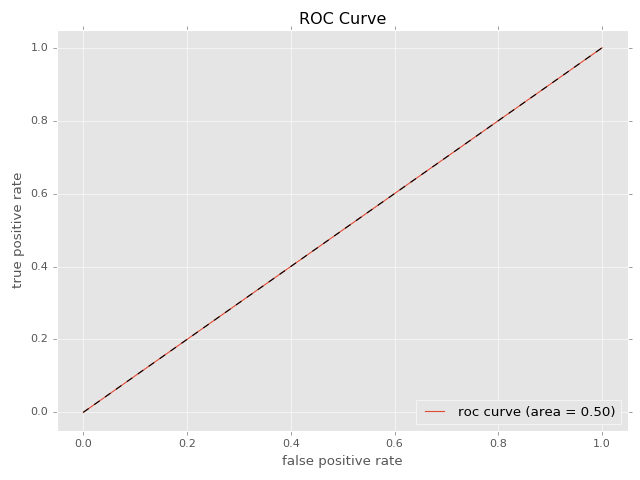

In [67]:
from sklearn import linear_model, svm, metrics
y_predicted = classifier.predict_proba(X_test)[:,0]
fpr, tpr, _ = metrics.roc_curve(y_test , y_predicted)
roc_auc = metrics.auc(fpr, tpr)

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(1)
plt.plot(fpr, tpr, label='roc curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()

In [55]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [56]:
y_predicted

array([ 0.17304005,  0.17304005,  0.17304005, ...,  0.17304005,
        0.17304005,  0.17304005])

In [58]:
np.unique(y_predicted)

array([ 0.17304005])